In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
%matplotlib inline

In [2]:
df_master = pd.read_csv("master.csv", index_col=0)
df_master.sample(5)

,County,year,CDC Week,FIPS,County Centroid,Week Ending Date,Count,Disease_INFLUENZA_A,Disease_INFLUENZA_B,Disease_INFLUENZA_UNSPECIFIED,UnempRate,GDP,GDP_change,Population,flu,fluSymptoms,fever,cough,soreThroat,Target,VaxRate,PRCP,SNOW,TAVG,TMAX,TMIN,SNOWDepth,Density,F_PRCP,F_SNOW,F_TAVG
Index_column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10350,ONONDAGA,2010,3,36067,"(43.0065299, -76.1961167)",01/23/2010,3,3,0,0,8.0,NaN,NaN,467527.0,0.003564,0.008640,0.182590,0.058183,0.183483,10.0,NaN,0.043333,0.233333,30.000000,37.571429,22.428571,5.142857,600.6333585992,0.040000,1.650000,20.928571
3895,DELAWARE,2017,46,36025,"(42.1939865, -74.966728)",11/18/2017,1,1,0,0,5.5,NaN,NaN,45020.0,0.005414,0.006202,0.353004,0.608386,0.195791,2.0,0.471,0.100000,0.778776,32.857143,43.142857,22.571429,0.000000,31.2110035773,0.031667,0.670556,32.214286
15534,SENECA,2014,14,36099,"(42.7652, -76.8721)",04/05/2014,2,1,1,0,5.6,1112183.0,1.0,34887.0,0.006289,0.008119,0.467656,0.164256,0.541414,1.0,0.631,0.041429,0.171429,37.428571,46.428571,28.428571,0.142857,13.0156918049,0.114286,0.171429,45.714286
17178,TIOGA,2013,11,36107,"(42.1256, -76.3637)",03/16/2013,1,1,0,0,7.1,1381202.0,8.1,50110.0,0.003500,0.000000,0.089460,0.403200,0.151003,2.0,NaN,0.197500,0.280000,29.785714,36.857143,22.714286,1.000000,96.6255302738,0.068000,0.066667,36.500000
8206,MADISON,2016,12,36053,"(42.9100255, -75.6635749)",03/26/2016,28,26,2,0,5.3,NaN,NaN,71291.0,0.015007,0.013193,0.389713,0.388343,0.383859,18.0,0.617,0.065000,0.016667,35.714286,49.142857,22.285714,3.833333,108.8678150388,0.151429,0.885714,24.071429


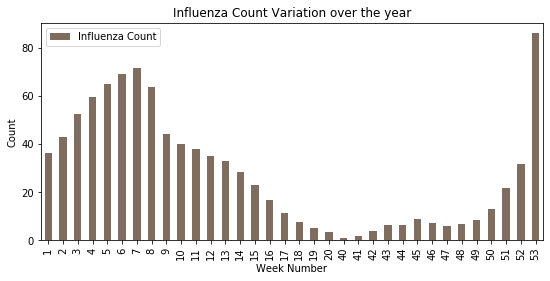

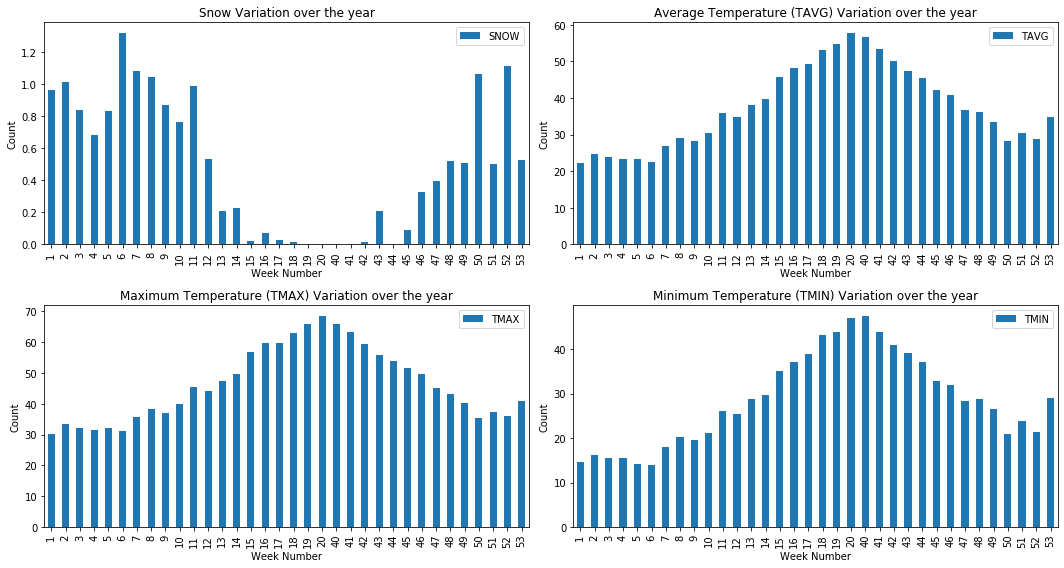

In [3]:
from math import ceil
df_master = df_master.rename(columns = {"CDC Week" : "Week Number"})
df_master = df_master.rename(columns = {"Count" : "Influenza Count"})
fig, ax1 = plt.subplots(figsize=(9,4))
df_master.groupby(['Week Number']).mean()['Influenza Count'].plot.bar(ax=ax1, legend = True, color='#7f6d5f', title = "Influenza Count Variation over the year")
ax1.set_ylabel("Count")
var_dict = {
    'SNOW': 'Snow',
    'TAVG': "Average Temperature (TAVG)",
    'TMAX': "Maximum Temperature (TMAX)",
    'TMIN': "Minimum Temperature (TMIN)"
}

monthly_feat = ['SNOW', 'TAVG', 'TMAX', 'TMIN']
fig, ax = plt.subplots(nrows= ceil(len(monthly_feat)/2),ncols=2, figsize=(15,8))

#fig.title.set_text('Weekly Variation in features')
plt.tight_layout()
for i in range(len(monthly_feat)):
  plt.tight_layout()
  df_master.groupby(['Week Number']).mean()[monthly_feat[i]].plot.bar(ax=ax[i//2,i%2], legend = True, title = var_dict[monthly_feat[i]] + " Variation over the year")
  ax[i//2,i%2].set_ylabel("Count")

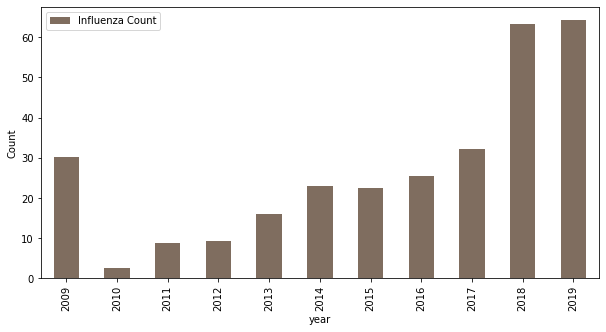

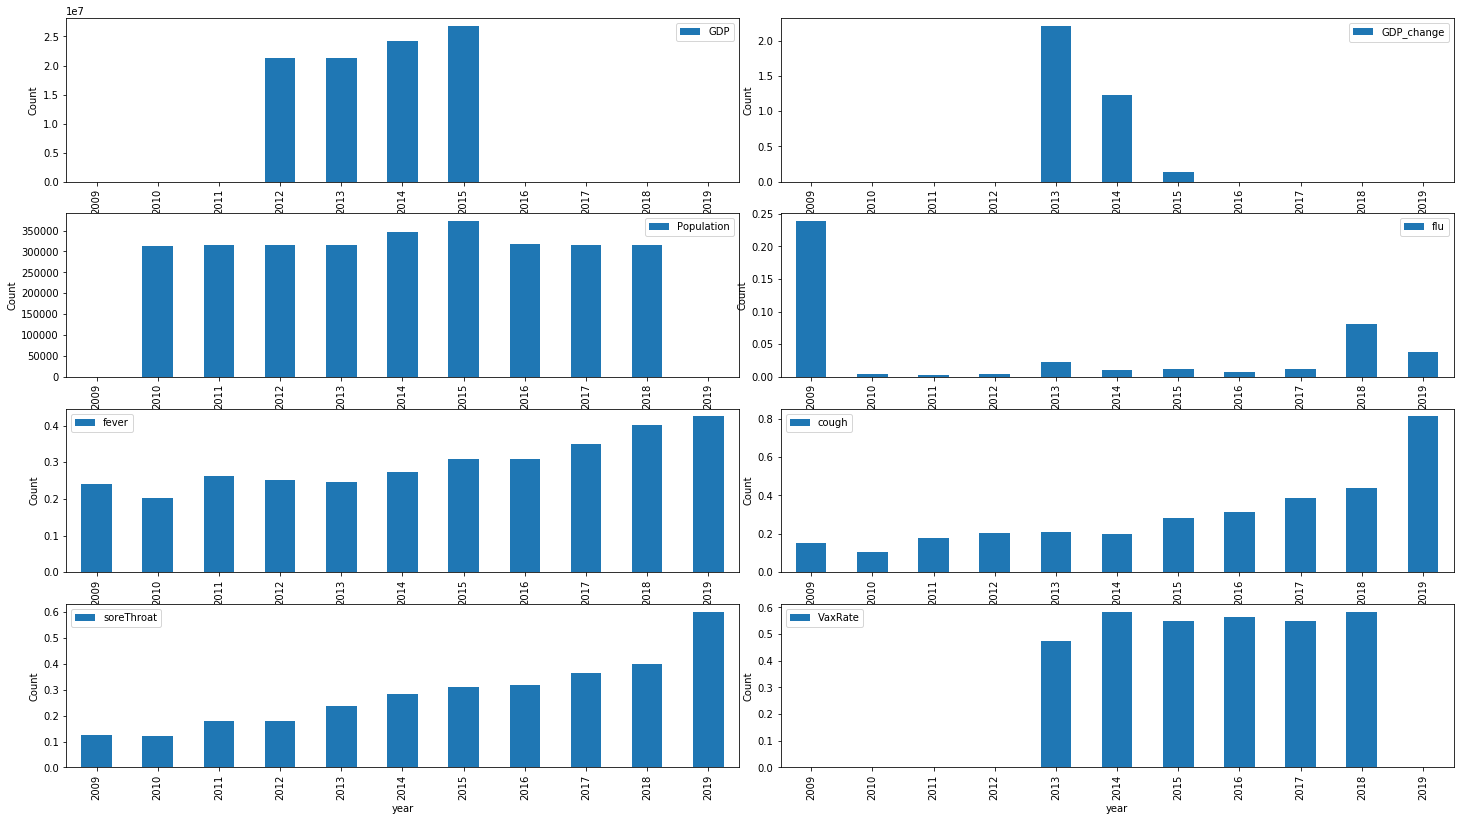

In [7]:
fig, ax1 = plt.subplots(figsize=(10,5))
df_master.groupby(['year']).mean()['Influenza Count'].plot.bar(ax=ax1, legend = True, color='#7f6d5f')
ax1.set_ylabel("Count")

yearly_feat = [ 'GDP', 'GDP_change', 'Population', 'flu', 'fever', 'cough', 'soreThroat', 'VaxRate']#, list(df_master.columns)[27]]
fig, ax = plt.subplots(nrows= ceil(len(yearly_feat)/2),ncols=2, figsize=(20,11))
plt.tight_layout()
for i in range(len(yearly_feat)):
  df_master.groupby(['year']).mean()[yearly_feat[i]].plot.bar(ax=ax[i//2,i%2], legend = True)
  ax[i//2,i%2].set_ylabel("Count")